<a href="https://colab.research.google.com/github/SarahSouzaPontes/Modelo_Dummy/blob/main/Modelo_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importando bibliotecas

In [12]:
#banco central a fonte
#https://dadosabertos.bcb.gov.br/dataset/27743-saldo-das-operacoes-de-credito-por-atividade-economica---industria-de-alimentos/resource/21fc51ca-5cff-46dc-8fd1-01fff8d530b0
df = pd.read_csv("/content/drive/MyDrive/dt.csv", sep = ";")
df

,data,valor
0,01/01/2012,60981
1,01/02/2012,60500
2,01/03/2012,64628
3,01/04/2012,66782
4,01/05/2012,68201
...,...,...
130,01/11/2022,128990
131,01/12/2022,130052
132,01/01/2023,123623
133,01/02/2023,122502


In [14]:
df.loc[:,"data"] = pd.to_datetime(df.data,format= '%d/%m/%Y')
df
#ano, mês e dia (bilhões)

<ipython-input-14-b55260719d64>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,"data"] = pd.to_datetime(df.data,format= '%d/%m/%Y')


,data,valor
0,2012-01-01,60981
1,2012-02-01,60500
2,2012-03-01,64628
3,2012-04-01,66782
4,2012-05-01,68201
...,...,...
130,2022-11-01,128990
131,2022-12-01,130052
132,2023-01-01,123623
133,2023-02-01,122502


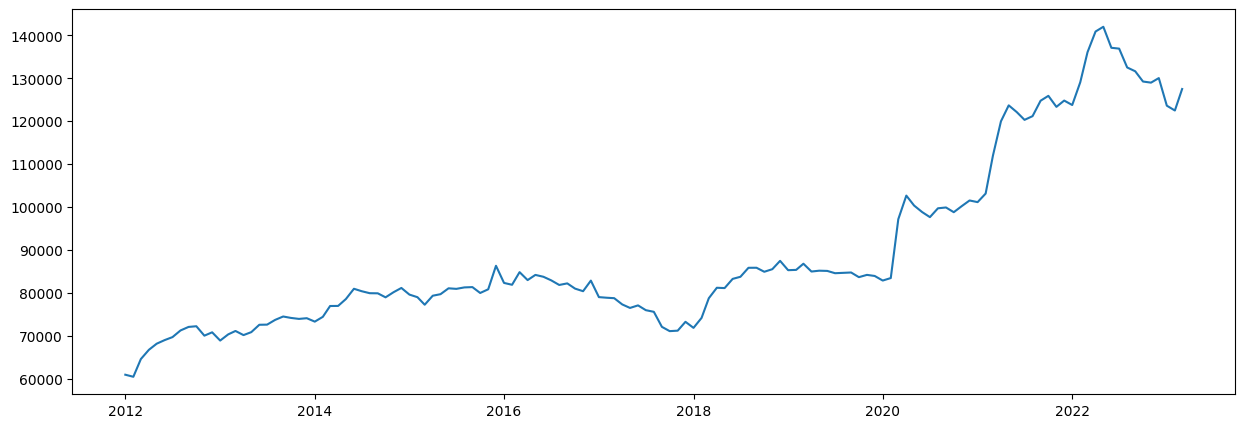

In [15]:
plt.figure(figsize=(15,5))
#eixo x
#eixo y
plt.plot(df.data, df.valor)

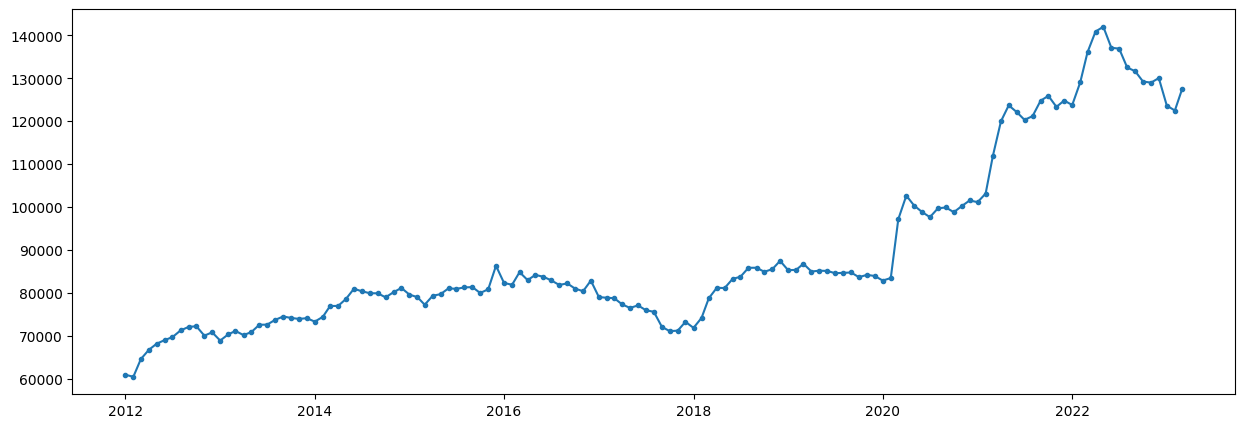

In [16]:
plt.figure(figsize=(15,5))
#eixo x
#eixo y
plt.plot(df.data, df.valor, ".-")
#inserir pontos no gáfico

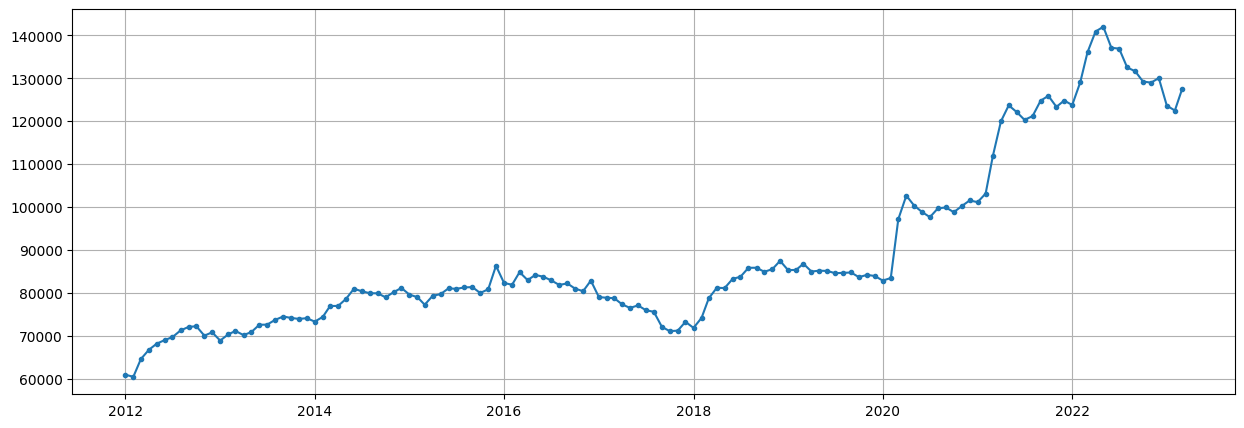

In [17]:
plt.figure(figsize=(15,5))
#eixo x
#eixo y
plt.plot(df.data, df.valor, ".-")
#inserir pontos no gáfico
#inserir grid
plt.grid()
#sazonalidade = comportamento de repetição

In [19]:
df.iloc[0]
#primeira linha



data     2012-01-01 00:00:00
valor                  60981
Name: 0, dtype: object

In [20]:
df.loc[df.data >'2020-01-01'].iloc[0].valor
#indice da primeira linha
#para cada linha da tabela vai ver se é verdade para retornar
#maior que janeiro de 2020

83487

In [28]:
predicoes = []
erros = []
# para cada data do meu dataframe vai pegar uma data dessa e executa o codigo populando a lista 
for dat in df.data:
      if dat == pd.to_datetime ('2012-01-01'):
        erros.append(np.nan)
        predicoes.append(np.nan)
        continue

      valor = df.loc[df.data== dat].valor.iloc[0]
      pred = df.loc[df.data == (dat - pd.DateOffset(months= 1))].valor.iloc[0]
  # um mês
      predicoes.append(pred)
      erros.append(pred-valor)

In [29]:
predicoes

[nan,
 60981,
 60500,
 64628,
 66782,
 68201,
 69046,
 69736,
 71288,
 72109,
 72267,
 70074,
 70852,
 68933,
 70374,
 71168,
 70205,
 70895,
 72611,
 72643,
 73746,
 74535,
 74205,
 73976,
 74139,
 73342,
 74458,
 76979,
 76999,
 78606,
 80992,
 80423,
 79959,
 79934,
 78999,
 80199,
 81182,
 79639,
 79030,
 77278,
 79374,
 79732,
 81101,
 80970,
 81309,
 81380,
 80011,
 80871,
 86343,
 82352,
 81923,
 84864,
 83012,
 84221,
 83785,
 82953,
 81879,
 82246,
 81030,
 80425,
 82893,
 79048,
 78902,
 78801,
 77347,
 76530,
 77123,
 76008,
 75624,
 72128,
 71129,
 71237,
 73298,
 71889,
 74203,
 78788,
 81227,
 81154,
 83294,
 83784,
 85876,
 85886,
 84952,
 85552,
 87492,
 85321,
 85391,
 86824,
 85006,
 85201,
 85150,
 84616,
 84690,
 84782,
 83696,
 84227,
 83973,
 82906,
 83487,
 97189,
 102685,
 100371,
 98854,
 97673,
 99730,
 99922,
 98823,
 100243,
 101551,
 101168,
 103160,
 111961,
 119980,
 123701,
 122132,
 120322,
 121187,
 124783,
 125917,
 123352,
 124816,
 123778,
 129079,


In [32]:
#nao é original com as predicoes
df_pred = pd.DataFrame()
df_pred.loc[:,'data'] = df.data
df_pred.loc[:,'valor'] = df.valor
df_pred.loc[:,'predicoes'] = predicoes
df_pred.loc[:,'erros'] = erros
df_pred

,data,valor,predicoes,erros
0,2012-01-01,60981,NaN,NaN
1,2012-02-01,60500,60981.0,481.0
2,2012-03-01,64628,60500.0,-4128.0
3,2012-04-01,66782,64628.0,-2154.0
4,2012-05-01,68201,66782.0,-1419.0
...,...,...,...,...
130,2022-11-01,128990,129249.0,259.0
131,2022-12-01,130052,128990.0,-1062.0
132,2023-01-01,123623,130052.0,6429.0
133,2023-02-01,122502,123623.0,1121.0


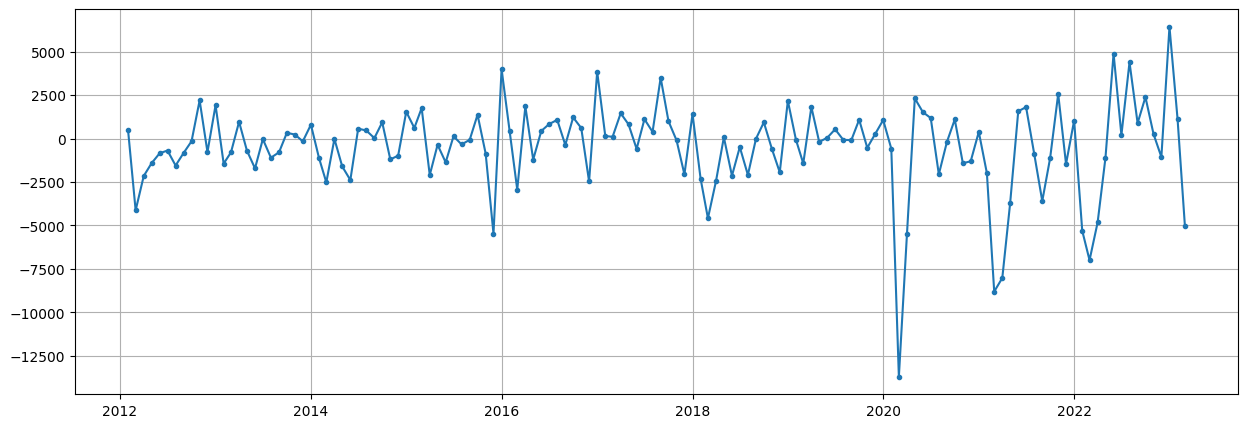

In [33]:
#modelo visualizando
plt.figure(figsize = (15,5))
plt.plot(df_pred.data, df_pred.erros, '.-')
plt.grid()

(18262.0, 19619.3)

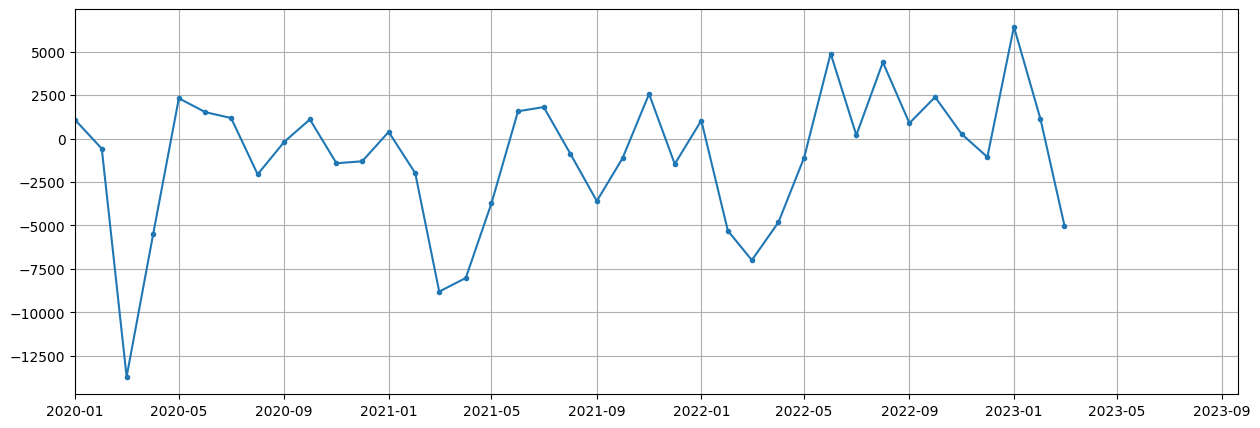

In [34]:
#zomm
plt.figure(figsize = (15,5))
plt.plot(df_pred.data, df_pred.erros, '.-')
plt.grid()
plt.xlim(left= pd.to_datetime('2020-01-01'))

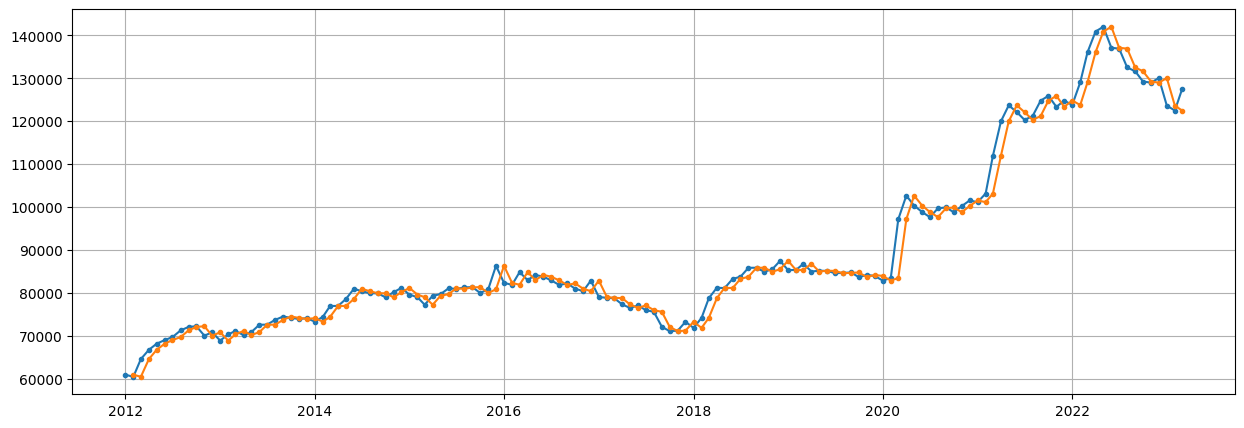

In [36]:
#valor e pred
plt.figure(figsize = (15,5))
plt.plot(df_pred.data, df_pred.valor, '.-')
plt.plot(df_pred.data, df_pred.predicoes, '.-')
plt.grid()


In [39]:
#modelo dummy mesma coisa do script da linha [28] do if
df.loc[:, "predicoes"]= df.valor.shift(1)
df

,data,valor,predicoes
0,2012-01-01,60981,NaN
1,2012-02-01,60500,60981.0
2,2012-03-01,64628,60500.0
3,2012-04-01,66782,64628.0
4,2012-05-01,68201,66782.0
...,...,...,...
130,2022-11-01,128990,129249.0
131,2022-12-01,130052,128990.0
132,2023-01-01,123623,130052.0
133,2023-02-01,122502,123623.0


In [40]:
df.loc[:,'erro'] = df.predicoes - df.valor
df

,data,valor,predicoes,erro
0,2012-01-01,60981,NaN,NaN
1,2012-02-01,60500,60981.0,481.0
2,2012-03-01,64628,60500.0,-4128.0
3,2012-04-01,66782,64628.0,-2154.0
4,2012-05-01,68201,66782.0,-1419.0
...,...,...,...,...
130,2022-11-01,128990,129249.0,259.0
131,2022-12-01,130052,128990.0,-1062.0
132,2023-01-01,123623,130052.0,6429.0
133,2023-02-01,122502,123623.0,1121.0


Areas de ML


*Classificao -> prever variavel finita  e não ordenada (há classificação com ordem, mas menos comum) SUPERVISIONADA


*Regressa0 -> ajustando função matematica (prever var continua e com ordem) SUPERVISIONADA


*Agrupamento -> grupos e padrões nos nosso dados -> NAO SUPERVISIONADA